The following implementation is for Harris Corner Detection as we showed in class.

**Task 1**: Try different parameters on "windows_size" and "threshold" for multiple image inputs [at least 2]

**Task 2**: Try different gradients calculation methods in Step 1.

**Task 3**: In Step 5 below, we have one way to calculate the response matrix. Please try different methods to calculate the response matrix.
Specifically, R = min(lambda_1, lambda_2) or R = det(M)/(trace(M)+epsilon), where 'epsilon' is small value.

**Task 4**: Line Detection via Harris Method

Harris method is a general method for both corner detection and edge detection. Please implement based on the harris corner code below.
After that, please compare with the learned edge detection filter methods. That is, please their results given the same input.

Finding Corners...


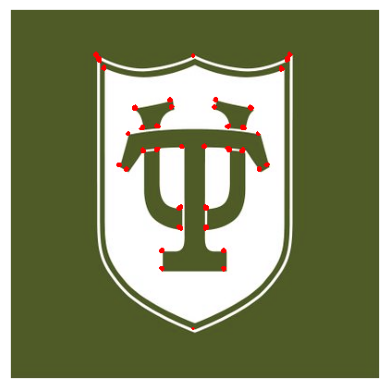

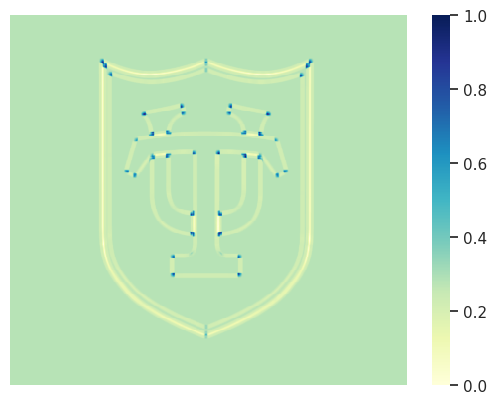

In [ ]:
import cv2
import numpy as np; np.random.seed(0)
from matplotlib import pyplot as plt
from skimage import io
import seaborn as sns; sns.set_theme()

def Harris_Corner(img, window_size, threshold):
    ## img is the input color image -> 3 Channels
    ## window_size means how many surrounding pixels are used


    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    height = img.shape[0]   #.shape[0] outputs height
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))

    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            k = 0.04
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R

    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # draw circle on the pixel with value larger than threshold
                cv2.circle(img,(x,y),1,(0,0,255))


    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()
    ## return response matrix with each element as the cornerness for this pixel
    return matrix_R

## entrance of the code

url = 'https://www.cs.tulane.edu/~zding1/tulane.jpg'
image = io.imread(url)

matrix_R = Harris_Corner(image, 5, 0.4) # Change this path to one that will lead to your image

ax = sns.heatmap(matrix_R, cmap="YlGnBu", xticklabels=False, yticklabels=False)

Task 1

Finding Corners...


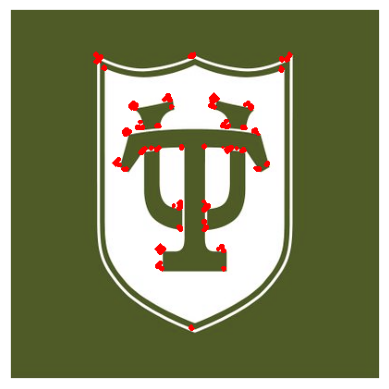

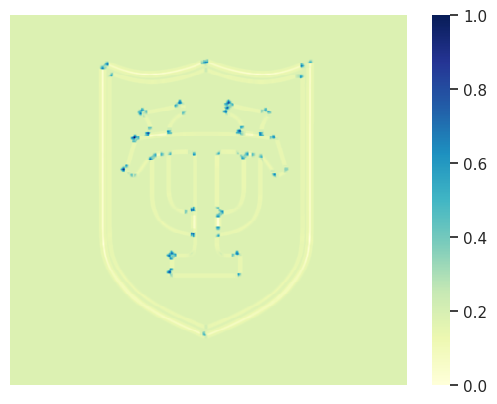

In [ ]:
matrix_R = Harris_Corner(image, 4, 0.3) # Change this path to one that will lead to your image

ax = sns.heatmap(matrix_R, cmap="YlGnBu", xticklabels=False, yticklabels=False)

Finding Corners...


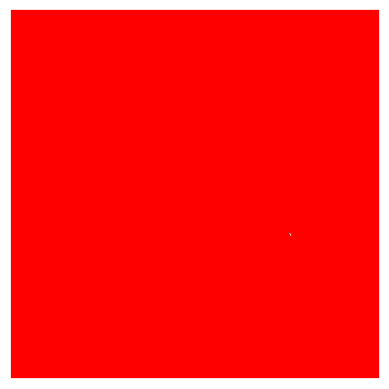

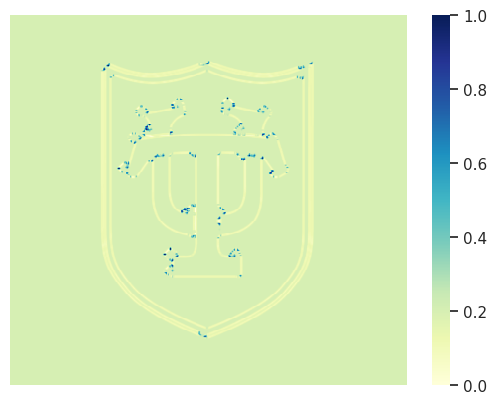

In [ ]:
matrix_R = Harris_Corner(image, 3, 0.1) # Change this path to one that will lead to your image

ax = sns.heatmap(matrix_R, cmap="YlGnBu", xticklabels=False, yticklabels=False)

In [ ]:
Task 2: Try different gradients calculation methods in Step 1.

In [ ]:


def Harris_Corner(img, window_size, threshold):
    ## img is the input color image -> 3 Channels
    ## window_size means how many surrounding pixels are used


    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    height = img.shape[0]   #.shape[0] outputs height
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))

    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
    dy= cv2.Scharr(gray, cv2.CV_64F, 0, 1)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
            k = 0.04
            det=np.linalg.det(H)
            tr=np.matrix.trace(H)
            R=det-k*(tr**2)
            matrix_R[y-offset, x-offset]=R

    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # draw circle on the pixel with value larger than threshold
                cv2.circle(img,(x,y),1,(0,0,255))


    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()
    ## return response matrix with each element as the cornerness for this pixel
    return matrix_R

Finding Corners...


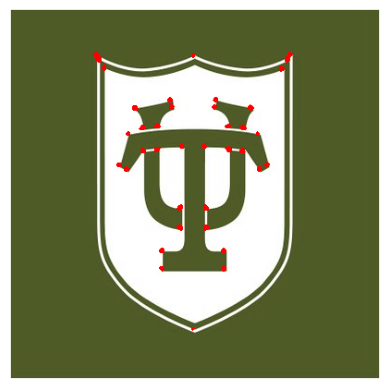

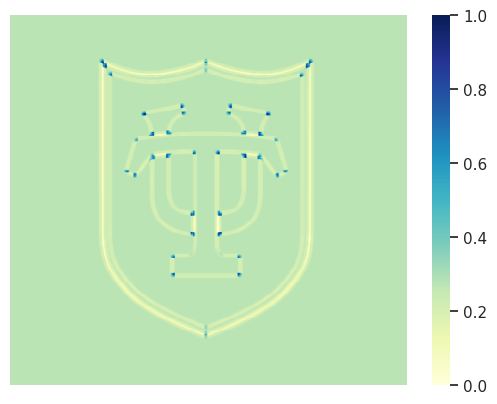

In [ ]:
url = 'https://www.cs.tulane.edu/~zding1/tulane.jpg'
image = io.imread(url)

matrix_R = Harris_Corner(image, 5, 0.4) # Change this path to one that will lead to your image

ax = sns.heatmap(matrix_R, cmap="YlGnBu", xticklabels=False, yticklabels=False)

Task 3: In Step 5 below, we have one way to calculate the response matrix. Please try different methods to calculate the response matrix. Specifically, R = min(lambda_1, lambda_2) or R = det(M)/(trace(M)+epsilon), where 'epsilon' is small value.

In [ ]:


def Harris_Corner(img, window_size, threshold):
    ## img is the input color image -> 3 Channels
    ## window_size means how many surrounding pixels are used


    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    height = img.shape[0]   #.shape[0] outputs height
    width = img.shape[1]    #.shape[1] outputs width .shape[2] outputs color channels of image
    matrix_R = np.zeros((height,width))

    #   Step 1 - Calculate the x e y image derivatives (dx e dy)
    dx = cv2.Scharr(gray, cv2.CV_64F, 1, 0)
    dy= cv2.Scharr(gray, cv2.CV_64F, 0, 1)

    #   Step 2 - Calculate product and second derivatives (dx2, dy2 e dxy)
    dx2=np.square(dx)
    dy2=np.square(dy)
    dxy=dx*dy

    offset = int( window_size / 2 )
    #   Step 3 - Calcular a soma dos produtos das derivadas para cada pixel (Sx2, Sy2 e Sxy)
    print ("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            #   Step 4 - Define the matrix H(x,y)=[[Sx2,Sxy],[Sxy,Sy2]]
            H = np.array([[Sx2,Sxy],[Sxy,Sy2]])

            #   Step 5 - Calculate the response function ( R=det(H)-k(Trace(H))^2 )
                # Method 1: R = det(H) / (trace(H) + epsilon)
            epsilon = 1e-6
            det = np.linalg.det(H)
            tr = np.trace(H)
            R = det / (tr + epsilon)

            matrix_R[y - offset, x - offset] = R

    #   Step 6 - Apply a threshold
    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            value=matrix_R[y, x]
            if value>threshold:
                # draw circle on the pixel with value larger than threshold
                cv2.circle(img,(x,y),1,(0,0,255))


    plt.figure("Manually implemented Harris detector")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()
    ## return response matrix with each element as the cornerness for this pixel
    return matrix_R


Finding Corners...


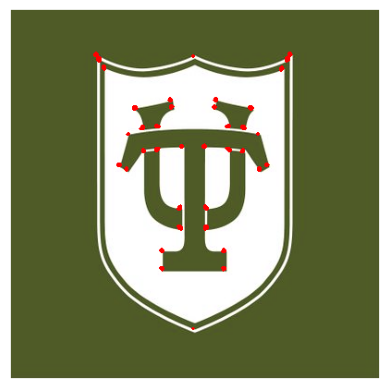

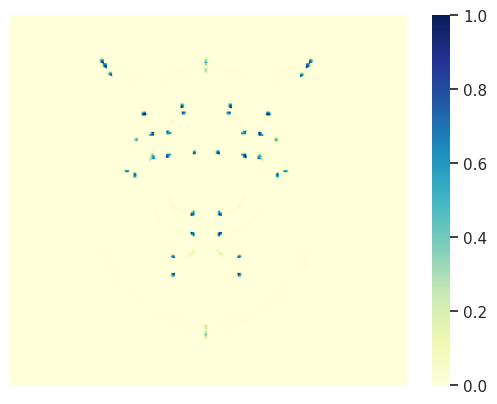

In [ ]:
url = 'https://www.cs.tulane.edu/~zding1/tulane.jpg'
image = io.imread(url)

matrix_R = Harris_Corner(image, 5, 0.4) # Change this path to one that will lead to your image

ax = sns.heatmap(matrix_R, cmap="YlGnBu", xticklabels=False, yticklabels=False)

Task 4: Line Detection via Harris Method

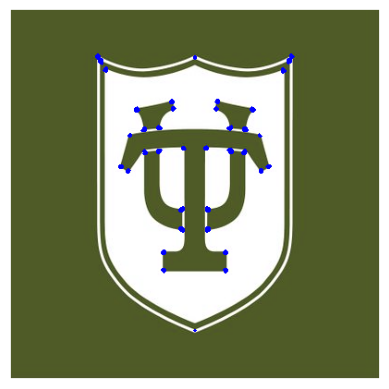

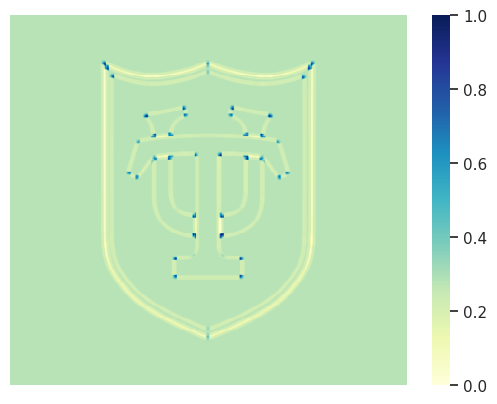

In [120]:
def Harris_Edge(img, window_size, threshold):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    height = img.shape[0]
    width = img.shape[1]

    matrix_R = np.zeros((height, width))


    dx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxy = dx * dy

    offset = int(window_size / 2)

    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            Sx2 = np.sum(dx2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sy2 = np.sum(dy2[y-offset:y+1+offset, x-offset:x+1+offset])
            Sxy = np.sum(dxy[y-offset:y+1+offset, x-offset:x+1+offset])

            H = np.array([[Sx2, Sxy], [Sxy, Sy2]])
            k = 0.04
            det = np.linalg.det(H)
            tr = np.matrix.trace(H)
            R = det - k * (tr ** 2)

            matrix_R[y, x] = R

    cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)


    for y in range(offset, height - offset):
        for x in range(offset, width - offset):
            value = matrix_R[y, x]
            if value > threshold:
                cv2.circle(img, (x, y), 1, (255, 0, 0), -1)


    plt.figure("Harris Edge Detection")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    plt.show()

    return matrix_R
url = 'https://www.cs.tulane.edu/~zding1/tulane.jpg'
image = io.imread(url)
matrix_R = Harris_Edge(image, 5, 0.4)
ax = sns.heatmap(matrix_R, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.show()

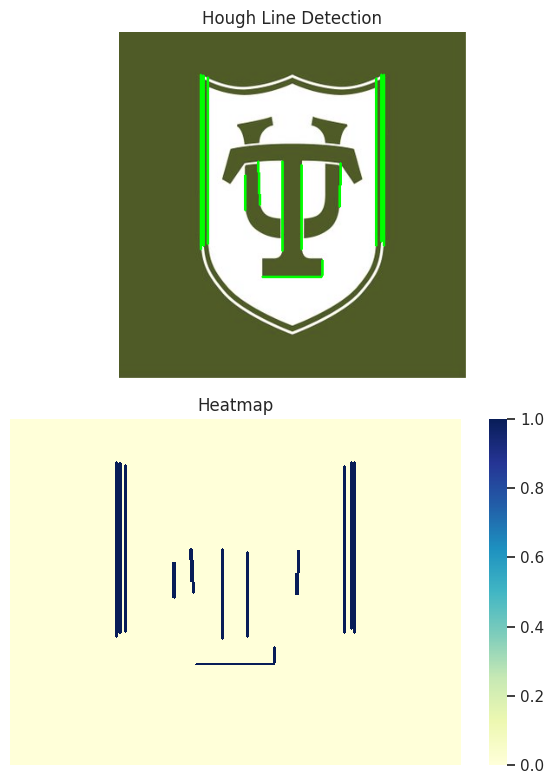

In [135]:
def Line_Detection(img, rho=1, theta=np.pi/180, threshold=60, min_line_length=10, max_line_gap=10):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    lines = cv2.HoughLinesP(edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

    line_img = np.copy(img)

    heatmap = np.zeros_like(gray, dtype=np.float32)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.line(heatmap, (x1, y1), (x2, y2), 1, 2)
    plt.figure(figsize=(6, 8))  # 调整图像大小，使图像上下排列时更清晰


    plt.subplot(2, 1, 1)  # 3行1列，显示第二个
    plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
    plt.title("Hough Line Detection")
    plt.axis('off')


    plt.subplot(2, 1, 2)
    sns.heatmap(heatmap, cmap="YlGnBu", xticklabels=False, yticklabels=False, cbar=True)
    plt.title("Heatmap")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


url = 'https://www.cs.tulane.edu/~zding1/tulane.jpg'
image = io.imread(url)
Line_Detection(image)